Load the Iris dataset and split into training and test set. Use Linear Regression to predict the
sepal length. Check the accuracy.

Next, apply PCA to reduce the dimensionality to 2 components. Again, use the regressor and
check the accuracy and the explained variance.

Finally, apply PCA to reduce the dimensionality to 1 component. Again, use the regressor and
check the accuracy and the explained variance.

# imports

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import pandas as pd

# Init

In [2]:
scores = []

# Load data

In [3]:
iris = datasets.load_iris()

In [4]:
df = pd.DataFrame(iris.data, columns=[name[:-5] for name in iris.feature_names])
X = df[["sepal width", "petal length", "petal width"]]
y = df["sepal length"]

X

,sepal width,petal length,petal width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,1.9
147,3.0,5.2,2.0
148,3.4,5.4,2.3


# Split train, test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, train_size=.75)
X_train.shape, X_test.shape

((112, 3), (38, 3))

# Linear Regression

## Build

In [6]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## Score

In [7]:
score = reg.score(X_test, y_test)
scores.append(("LR [all]", score))
score

0.8616861039388237

### plot

In [8]:
y_pred_reg = reg.predict(X_test)

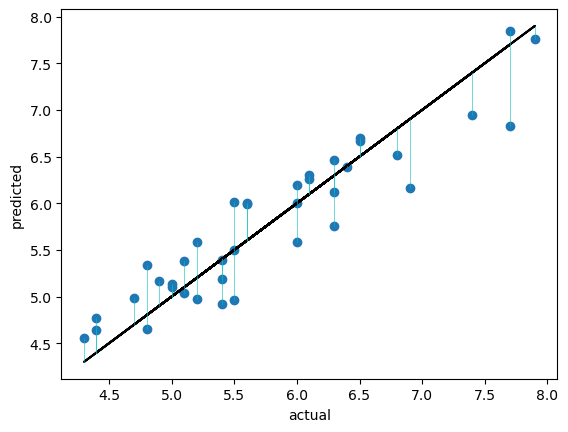

In [9]:
plt.scatter(y_test.values, y_pred_reg)
plt.xlabel("actual")
plt.ylabel("predicted")

plt.plot(y_test.values, y_test.values, c="black")

for p1, p2 in zip(y_test.values, y_pred_reg):
    plt.plot([p1, p1], [p1, p2], c='c', linewidth=.4)

In [10]:
pd.DataFrame(reg.coef_, X.columns, columns=['Coefficients'])

,Coefficients
sepal width,0.654644
petal length,0.730509
petal width,-0.628798


# PCA

## PCA 2

### fit & transform pca

In [11]:
pca2 = PCA(n_components=2)
pca2.fit(X_train)

PCA(n_components=2)

In [12]:
X_train_pca2 = pd.DataFrame(pca2.transform(X_train))
X_train_pca2.head()

,0,1
0,-2.729415,0.614348
1,0.083339,-0.343735
2,-0.291132,-1.078217
3,-2.828677,-0.113549
4,2.292368,0.410233


### Train LinearRegression

In [13]:
reg_pca2 = LinearRegression()
reg_pca2.fit(X_train_pca2, y_train)

LinearRegression()

### Score

In [14]:
score = reg_pca2.score(pca2.transform(X_test), y_test)
scores.append(("LR [PCA 2]", score))
score

0.8470405791831014

## PCA 1

### fit & transform pca

In [15]:
pca1 = PCA(n_components=1)
pca1.fit(X_train)

PCA(n_components=1)

In [16]:
X_train_pca1 = pd.DataFrame(pca1.transform(X_train))
X_train_pca1.head()

,0
0,-2.729415
1,0.083339
2,-0.291132
3,-2.828677
4,2.292368


### Train LinearRegression

In [17]:
reg_pca1 = LinearRegression()
reg_pca1.fit(X_train_pca1, y_train)

LinearRegression()

### Score

In [18]:
score = reg_pca1.score(pca1.transform(X_test), y_test)
scores.append(("LR [PCA 1]", score))
score

0.7522452917593822

# Listing scores

In [19]:
pd.DataFrame(scores, columns=["model", "score"]).sort_values("score", ascending=False)

,model,score
0,LR [all],0.861686
1,LR [PCA 2],0.847041
2,LR [PCA 1],0.752245


The `LinearRegression` model without `PCA` *(Principal component analysis)* has the highest score of $\approx 0.86 \%$